<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_5)_synthetic_KRR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kernel Ridge Regression**

## **Import libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score

## **Generate synthetic dataset**

In [4]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature data
y = 4 + 3 * X.ravel() + np.random.randn(100)  # here we adding target with some noise

In [5]:
data = pd.DataFrame({'Feature': X.ravel(), 'Target': y})

In [6]:
data

,Feature,Target
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
...,...,...
95,0.987591,6.146963
96,1.045466,7.059295
97,0.855082,6.906398
98,0.050838,4.429206


## **Raw Data Visualization**

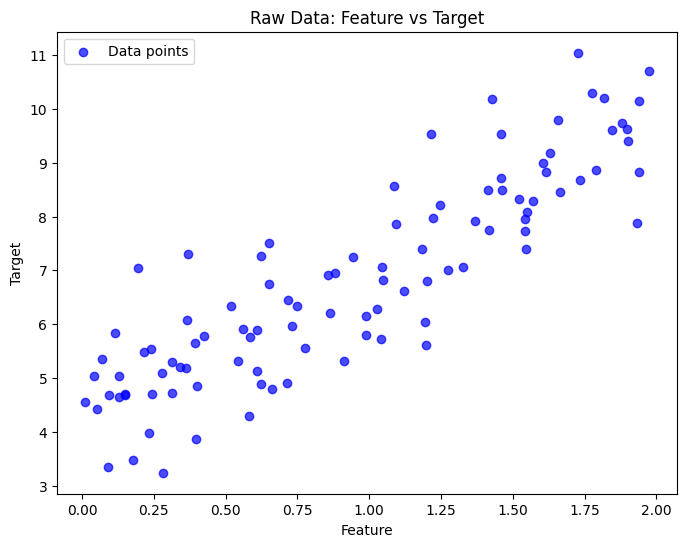

In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.title('Raw Data: Feature vs Target')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## **Dataset Splitting Process**

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Training the Kernel Ridge Regression model**

In [10]:

krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.5)
krr.fit(X_train_scaled, y_train)

KernelRidge(alpha=1.0, gamma=0.5, kernel='rbf')

In [11]:
y_train_pred = krr.predict(X_train_scaled)
y_test_pred = krr.predict(X_test_scaled)

## **Model Evaluation**

In [12]:

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

Training MSE: 0.865773409763141
Testing MSE: 0.7975411548409973
Training R2 Score: 0.7530774538752265
Testing R2 Score: 0.7647830919314216


## **Visualizing model predictions vs actual values**

In [13]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

## **Training predictions**

Text(0, 0.5, 'Predicted Values')

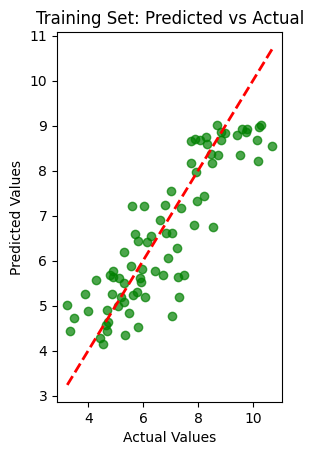

In [14]:

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## **Testing predictions**

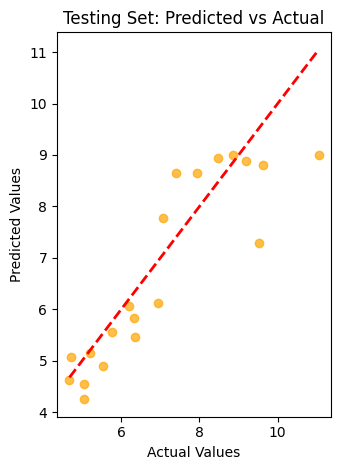

In [15]:

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Testing Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## **Visualizing Kernel Ridge Regression Fit on entire data**

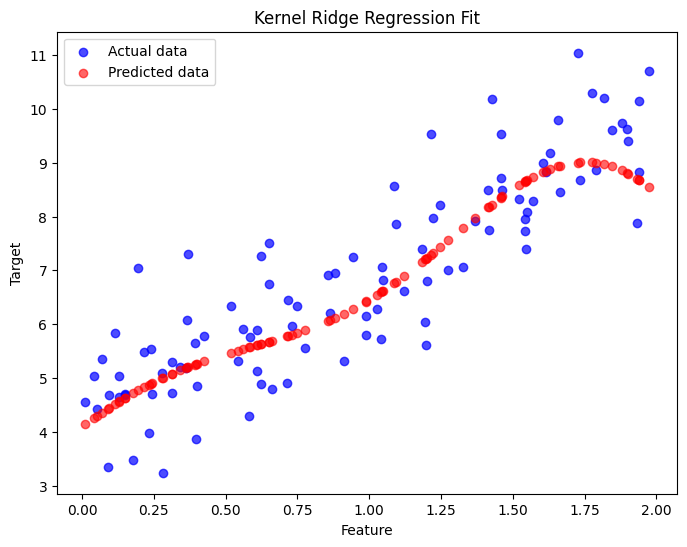

In [16]:

X_all_scaled = scaler.transform(X)
y_all_pred = krr.predict(X_all_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Actual data')
plt.scatter(X, y_all_pred, color='red', alpha=0.6, label='Predicted data')
plt.title('Kernel Ridge Regression Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()